# CollabMP3

### Connecting Spotify

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

lz_uri = 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id='2e01fb70abfd40ae8b2a5c6d26b14342',
        client_secret= 'c83aaf8534e5452a9db69971fb83a666',))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:5]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Lost
audio    : https://p.scdn.co/mp3-preview/94ecce736afb1d39b32355dabcbe2680d302c2ae?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b2738542fd936fb29c16b4a9df86

track    : In the End
audio    : https://p.scdn.co/mp3-preview/91f72a7835abc272a11f9e659ef71234bb476000?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273e2f039481babe23658fc719a

track    : Numb
audio    : https://p.scdn.co/mp3-preview/de3bfecab86ee831098a12e412fa39bd2e9d414b?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b273b4ad7ebaf4575f120eb3f193

track    : What I've Done
audio    : https://p.scdn.co/mp3-preview/6ddd4170ac6d3a034abd3f8a1c31a5f0e6a24a19?cid=2e01fb70abfd40ae8b2a5c6d26b14342
cover art: https://i.scdn.co/image/ab67616d0000b27346e207de66ba06422897f769

track    : Numb / Encore
audio    : https://p.scdn.co/mp3-preview/1f7814dd953a644eb61be5db2589c27e6e9e361d?cid=2e01fb70abfd40ae8b2a5c6d2

In [116]:
cid = "808325297aab40ae95147c06419ed138"
secret = "0c85b6d7358a4f7194788d0a87ddfb10"
username = "f1ohen1s24fvgko7dz28oazt7"
redirect_uri = "http://localhost:9000"

### Importing Libraries

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Data Preprocessing

In [35]:
data = pd.read_csv("SpotifyFeatures.csv")
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [69]:
def visualize(data):
    corr = data.corr(method="pearson")
    plt.figure(figsize=(14,6))
    heatmap = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="Black")
    heatmap.set_title("Correlation")
    
    sample = data.sample(int(0.001*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")
    
    sns.set_style(style="darkgrid")
    plt.title("Duration of Songs")
    sns.color_palette("rocket", as_cmap = True)
    sns.barplot(y="genre", x="duration_ms", data = data)

    sns.set_style(style = "darkgrid")
    plt.figure(figsize=(10,5))
    famous = data.sort_values("popularity", ascending=False)
    sns.barplot(y="genre", x="popularity", data = famous).set(title="Top Genres by Popularity")

Number of samples taken:  232


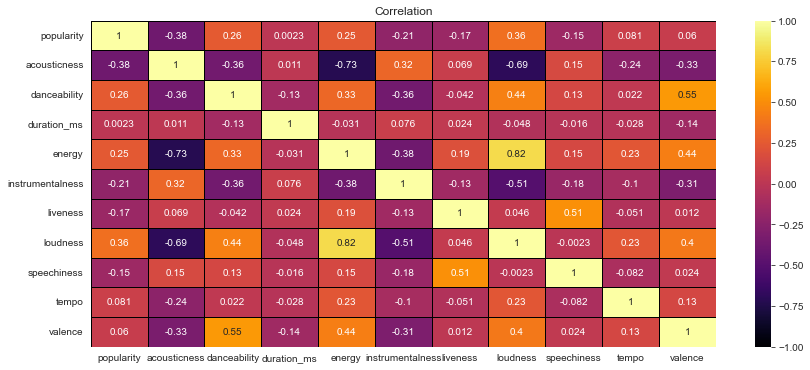

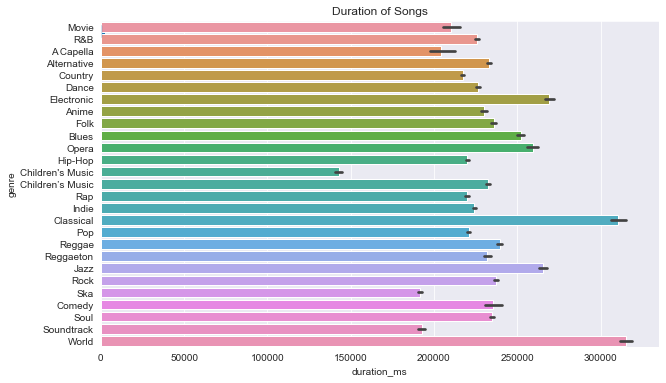

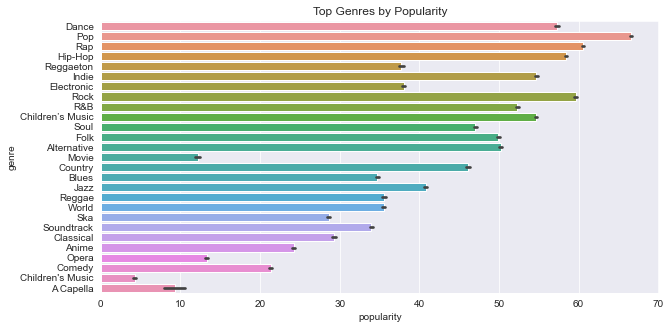

In [70]:
visualize(data)

In [36]:
def plot1(data):
    print("Mean value of acousticness:", data['acousticness'].mean())
    sns.histplot(x='acousticness', data=data, kde=True)
    plt.xlabel('Acoustincess', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

def plot2(data):
    # mean value and histplot for for energy feature
    print("Mean value of energy:", data['energy'].mean())
    sns.histplot(x='energy', data=data, kde=True)
    plt.xlabel('Energy', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.tight_layout()

Mean value of acousticness: 0.36856045175644825


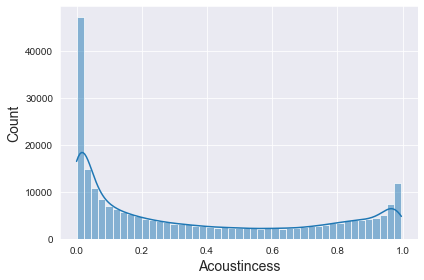

In [60]:
plot1(data)

Mean value of energy: 0.57095767347127


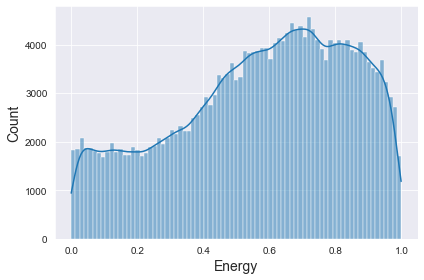

In [58]:
plot2(data)

In [65]:
def plot3(data):
    sample = data.sample(int(0.001*len(data)))
    print("Number of samples taken: ",len(sample))

    plt.figure(figsize=(10,6))
    sns.regplot(data=sample, y="acousticness", x="energy").set(title="Acousticness vs Energy")

Number of samples taken:  232


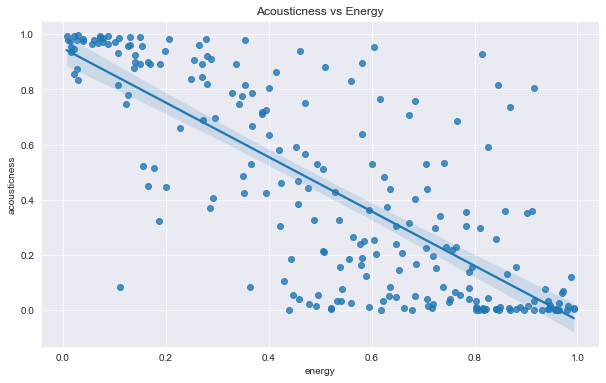

In [66]:
plot3(data)

### Cluster creation

In [142]:
def plot_clus(X, Y, kmeans):
    plt.figure(figsize=(10,6))
    plt.scatter(X[Y==0,0], X[Y==0,1], s=5, c='red', label="Cluster 1")
    plt.scatter(X[Y==1,0], X[Y==1,1], s=5, c='green', label="Cluster 2")
    plt.scatter(X[Y==2,0], X[Y==2,1], s=5, c='blue', label="Cluster 3")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c="black", label='Centroids')
    plt.title("Clusters")

def cluster(data):
    X = data.iloc[:, [5,8]].values
    
    wcss = []
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
    
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.show()
    
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0) 
    
    Y = kmeans.fit_predict(X)
    
    plot_clus(X, Y, kmeans)

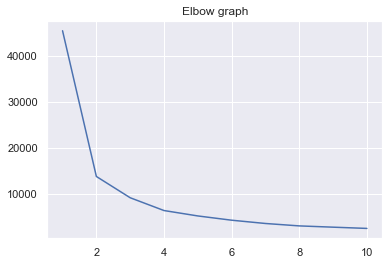

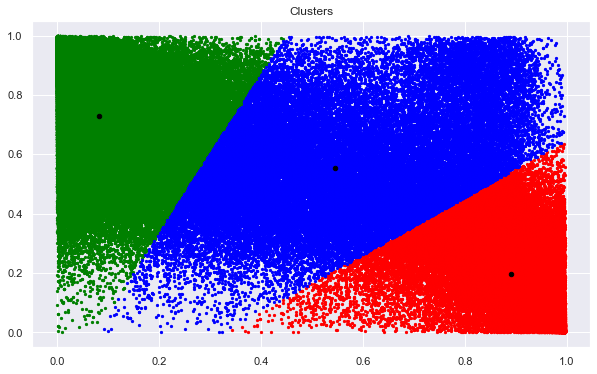

In [143]:
cluster(data)

Most Popular Songs

In [2]:
def most_popular(data):
    df2 = data.copy()
    df2.drop_duplicates(subset = "track_name", inplace = True) #dropping duplicate songs
    df2.head()
    
    rslt_df = df2.sort_values(by = 'popularity', ascending = False)
    rslt_df = rslt_df[['genre', 'artist_name', 'track_name']]
    
    print("Top 10 most popular songs:\n")
    for i in range(10):
        row_list = rslt_df.loc[i, :].values.flatten().tolist()
        print(row_list[1], "-", row_list[2])

In [8]:
most_popular(data)

Top 10 most popular songs:

Henri Salvador - C'est beau de faire un Show
Martin & les fées - Perdu d'avance (par Gad Elmaleh)
Joseph Williams - Don't Let Me Be Lonely Tonight
Henri Salvador - Dis-moi Monsieur Gordon Cooper
Fabien Nataf - Ouverture
Henri Salvador - Le petit souper aux chandelles
Martin & les fées - Premières recherches (par Paul Ventimila, Lorie Pester, Véronique Jannot, Michèle Laroque & Gérard Lenorman)
Laura Mayne - Let Me Let Go
Chorus - Helka
Le Club des Juniors - Les bisous des bisounours


### Code for single track that is being playing in real time by the user

In [14]:
from spotipy.oauth2 import SpotifyOAuth

client_ID= "808325297aab40ae95147c06419ed138"
client_SECRET= "0c85b6d7358a4f7194788d0a87ddfb10"
redirect_url= "http://localhost:9000"

In [15]:
def read_current_play():
    try:
        results= sp.current_playback()
    except:
        sp= spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_ID, 
                                                      client_secret=client_SECRET,
                                                      redirect_uri=redirect_url, 
                                                      scope="user-read-playback-state", 
                                                      open_browser=False))
        results= sp.current_playback()
    return currently_playing(results)

In [16]:
def get_features(play):
  df=  pd.DataFrame(sp.audio_features(play.id))
  return df.drop(columns=['type', 'uri', 'track_href', 'analysis_url'])

In [17]:
class currently_playing:
  def __init__(self, results):
    self.results= results
    self.id= results['item']['id']
    self.time= results['item']['duration_ms']
    self.popularity= results['item']['popularity']
  def info(self):
    name= []
    print(f"Track name: {self.results['item']['album']['name']}")
    for artist in self.results["item"]["artists"]:
        name.append(artist['name'])
    print("Artists: ", end="")
    print(", ".join(name))
    print(f"Popularity: {self.popularity}")
    print(f"Release Date: {self.results['item']['album']['release_date']}")
  def artists(self):
    artist_ids= []
    for artist in self.results["item"]["artists"]:
        artist_ids.append(artist['id'])
    return artist_ids
  def track_name(self):
    return self.results['item']['album']['name']

In [18]:
playing= read_current_play()

Go to the following URL: https://accounts.spotify.com/authorize?client_id=808325297aab40ae95147c06419ed138&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A9000&scope=user-read-playback-state
Enter the URL you were redirected to: http://localhost:9000/?code=AQBr5abfCMw_A6LJhWAEfHElQxT4FAxcy8BijZx5bMt8cxmh-vatbvV4OqI3UgBp-w3hAljjx5C0a7mE9IMWApP0iPftwOCSKj0qi-vftKn-6hzAUQRAbTiXsl8Vhd3UfJ-1Xib5LEQpDvYFJ2IhomFCiZCFRjyM9YKnGC20-s53Q8ZtNR-8LXaDkXiSUV2oj22t


TypeError: 'NoneType' object is not subscriptable

### Euclidean Distance

In [118]:
A = [[0.000953 , 0.762]]

In [145]:
from scipy.spatial import distance

def AddPoint(plot, x, y, color):
    plot.scatter(x, y, c=color)
    plot.figure(figsize=(10,6))
    plot.show()

def cal_cluster(A):
    dist=[]
    X = data.iloc[:, [5,8]].values
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)     
    Y = kmeans.fit_predict(X)
    for i in range(len(kmeans.cluster_centers_)):
        dist.append(distance.euclidean(kmeans.cluster_centers_[i], A))
#     print(dist)
    num = pd.Series(dist).idxmin()

    if(num==0):
        print("Song is in RED cluster")
    elif(num==1):
        print("Song is in GREEN cluster")
    else:
        print("Song is in BLUE cluster")

Song is in GREEN cluster


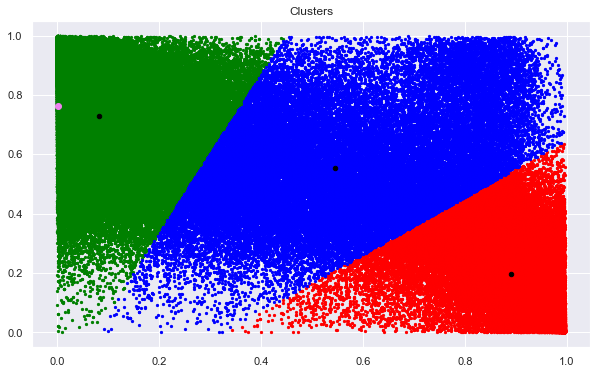

<Figure size 720x432 with 0 Axes>

In [146]:
#determining which cluster the given song is in
cal_cluster(A)

#plotting the song in the scatter plot
plot_clus(X, Y, kmeans)
AddPoint(plt, A[0][0], A[0][1], 'violet')